# Table of contents

* [Preprocessing](#Preprocessing)
* [Analyze](#Analyze)
* [Visualize](#Visualize)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

### Import Data

In [2]:
academy= pd.read_excel('./data/helloworld_data_set.xlsx', sheet_name = "학원교습소정보")
grdp= pd.read_excel('./data/helloworld_data_set.xlsx', sheet_name = "GRDP")
pop_age= pd.read_csv('./data/서울시 주민등록연앙인구(연령별동별) 통계.csv')

### Preprocessing
전처리 수행(결측값 처리, 중복값 처리, 이상치 처리 등)

In [3]:
pop_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   자치구       1356 non-null   object
 1   동         1356 non-null   object
 2   구분        1356 non-null   object
 3   계         1356 non-null   object
 4   0~4세      1356 non-null   object
 5   5~9세      1356 non-null   object
 6   10~14세    1356 non-null   object
 7   15~19세    1356 non-null   object
 8   20~24세    1356 non-null   object
 9   25~29세    1356 non-null   object
 10  30~34세    1356 non-null   object
 11  35~39세    1356 non-null   object
 12  40~44세    1356 non-null   object
 13  45~49세    1356 non-null   object
 14  50~54세    1356 non-null   object
 15  55~59세    1356 non-null   object
 16  60~64세    1356 non-null   object
 17  65~69세    1356 non-null   object
 18  70~74세    1356 non-null   object
 19  75~79세    1356 non-null   object
 20  80~84세    1356 non-null   object
 21  85~89세    1356

-분석에 필요없는 열 삭제

In [4]:
#데이터타입 int로 변경
pop_age['0~4세'] = pd.to_numeric(pop_age['0~4세'],errors='coerce')
pop_age['5~9세'] = pd.to_numeric(pop_age['5~9세'],errors='coerce')
pop_age['10~14세'] = pd.to_numeric(pop_age['10~14세'],errors='coerce')
pop_age['15~19세'] = pd.to_numeric(pop_age['15~19세'],errors='coerce')
pop_age['20~24세'] = pd.to_numeric(pop_age['20~24세'],errors='coerce')
pop_age['30~34세'] = pd.to_numeric(pop_age['30~34세'],errors='coerce')
pop_age['45~49세'] = pd.to_numeric(pop_age['45~49세'],errors='coerce')
pop_age['50~54세'] = pd.to_numeric(pop_age['50~54세'],errors='coerce')
pop_age['70~74세'] = pd.to_numeric(pop_age['70~74세'],errors='coerce')
pop_age['75~79세'] = pd.to_numeric(pop_age['75~79세'],errors='coerce')
pop_age['80~84세'] = pd.to_numeric(pop_age['80~84세'],errors='coerce')
pop_age['85~89세'] = pd.to_numeric(pop_age['85~89세'],errors='coerce')
pop_age['90~94세'] = pd.to_numeric(pop_age['90~94세'],errors='coerce')
pop_age['95~99세'] = pd.to_numeric(pop_age['95~99세'],errors='coerce')
pop_age['100세 이상+'] = pd.to_numeric(pop_age['100세 이상+'],errors='coerce')

In [5]:
#결측값 확인
pop_age.isnull().sum()

자치구           0
동             0
구분            0
계             0
0~4세        136
5~9세        227
10~14세      256
15~19세      277
20~24세      541
25~29세        0
30~34세      689
35~39세        0
40~44세        0
45~49세      734
50~54세      767
55~59세        0
60~64세        0
65~69세        0
70~74세      249
75~79세      148
80~84세       83
85~89세       73
90~94세       32
95~99세       18
100세 이상+    298
dtype: int64

In [6]:
#결측치 중앙값으로 대체
pop_age['0~4세'] = pop_age['0~4세'].fillna(pop_age['0~4세'].median())
pop_age['0~4세'] = pop_age['0~4세'].astype('int')
pop_age['5~9세'] = pop_age['5~9세'].fillna(pop_age['5~9세'].median())
pop_age['5~9세'] = pop_age['5~9세'].astype('int')
pop_age['10~14세'] = pop_age['10~14세'].fillna(pop_age['10~14세'].median())
pop_age['10~14세'] = pop_age['10~14세'].astype('int')
pop_age['15~19세'] = pop_age['15~19세'].fillna(pop_age['15~19세'].median())
pop_age['15~19세'] = pop_age['15~19세'].astype('int')
pop_age['20~24세'] = pop_age['20~24세'].fillna(pop_age['20~24세'].median())
pop_age['20~24세'] = pop_age['20~24세'].astype('int')
pop_age['30~34세'] = pop_age['30~34세'].fillna(pop_age['30~34세'].median())
pop_age['30~34세'] = pop_age['30~34세'].astype('int')
pop_age['45~49세'] = pop_age['45~49세'].fillna(pop_age['45~49세'].median())
pop_age['45~49세'] = pop_age['45~49세'].astype('int')
pop_age['50~54세'] = pop_age['50~54세'].fillna(pop_age['50~54세'].median())
pop_age['50~54세'] = pop_age['50~54세'].astype('int')
pop_age['70~74세'] = pop_age['70~74세'].fillna(pop_age['70~74세'].median())
pop_age['70~74세'] = pop_age['70~74세'].astype('int')
pop_age['75~79세'] = pop_age['75~79세'].fillna(pop_age['75~79세'].median())
pop_age['75~79세'] = pop_age['75~79세'].astype('int')
pop_age['80~84세'] = pop_age['80~84세'].fillna(pop_age['80~84세'].median())
pop_age['80~84세'] = pop_age['80~84세'].astype('int')
pop_age['85~89세'] = pop_age['85~89세'].fillna(pop_age['85~89세'].median())
pop_age['85~89세'] = pop_age['85~89세'].astype('int')
pop_age['90~94세'] = pop_age['90~94세'].fillna(pop_age['90~94세'].median())
pop_age['90~94세'] = pop_age['90~94세'].astype('int')
pop_age['95~99세'] = pop_age['95~99세'].fillna(pop_age['95~99세'].median())
pop_age['95~99세'] = pop_age['95~99세'].astype('int')

#100세 이상 결측값은 0으로 대체
pop_age['100세 이상+'] = pop_age['100세 이상+'].fillna(0)
pop_age['100세 이상+'] = pop_age['100세 이상+'].astype('int')

In [7]:
#이상치 없음

In [8]:
#중복값 삭제
#자치구열에 합계 행 삭제
all = pop_age[pop_age['자치구'].str.contains('합계')].index
pop_age.drop(all, inplace=True)

### Analyze

#### 분석에 필요하지 않은 데이터 정리

In [9]:
#자치구만 냅두고 '~동' 이 들어간 행은 삭제
all = pop_age[pop_age['동'].str.contains('동')].index
pop_age.drop(all, inplace=True)

In [10]:
#구분 열에 남자 삭제
all = pop_age[pop_age['구분'].str.contains('남자')].index
pop_age.drop(all, inplace=True)

In [11]:
#구분 열에 여자 삭제
all = pop_age[pop_age['구분'].str.contains('여자')].index
pop_age.drop(all, inplace=True)

In [12]:
#시각화에 필요없는 열 삭제(학령인구만 냅두기)
pop_age=pop_age.drop(['동','구분','0~4세','20~24세','25~29세','30~34세', '35~39세','40~44세','45~49세','50~54세','55~59세',
                      '60~64세','65~69세','70~74세','75~79세','80~84세', '85~89세','90~94세','95~99세','100세 이상+'], axis=1)

In [13]:
#기존 '계' 열이 100세 이상까지의 모든 합계를 계산해서 삭제(아래 새로운걸로 추가함)
pop_age=pop_age.drop(['계'], axis=1)

In [14]:
pop_age=pop_age.sort_values(by=['자치구'])

In [15]:
#기존의 '계' 대신 진짜 필요한 학령인구들의 합계를 다시 계산해서 새로운 열로 추가
pop_age['계'] = [81486,58305,30103,65490,39587,36067,44432,20842,70698,35367,34172,40667,41206,33882,64889,29465,52755,86567,69258,36844,21954,54286,14972,9998,38208]

In [16]:
#자치구 기준 정렬
academy.sort_values(by=['자치구'])

,자치구,학원/교습소,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정명,정원합계,일시수용능력인원합계,인당수강료내용,기숙사학원여부,등록일자,휴원시작일자,휴원종료일자,개설일자,개설연도
8564,강남구,학원,아이비스학원,강남구 삼성로 331,/ 2층 (대치동),입시.검정 및 보습,보통교과,보습,201,129,알수없음,N,2012-11-20,0,0,2012-11-20,2012
10501,강남구,학원,이루리2관학원,강남구 도곡로77길 5,/ 5층 전체 (대치동),입시.검정 및 보습,보통교과,보습·논술,260,81,알수없음,N,2014-09-02,0,0,2014-09-02,2014
20148,강남구,학원,새움입시연구소`길`학원,강남구 도곡로73길 5,/ 4층 전체 (대치동),입시.검정 및 보습,진학지도,진학상담지도,25,71,알수없음,N,2020-08-31,0,0,2020-08-31,2020
20150,강남구,교습소,해솔수학교습소,강남구 선릉로 320,/ 302호 (대치동/ 성진빌딩),입시.검정 및 보습,보통교과,보습,42,6,알수없음,N,2020-09-03,0,0,2020-09-03,2020
10496,강남구,학원,스터디피티학원,강남구 도곡로63길 27,/ 1층?3층 (대치동/ 시온빌딩),입시.검정 및 보습,보통교과,보습·논술,1160,73,알수없음,N,2014-07-17,0,0,2014-07-17,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,중랑구,교습소,수(秀)피아노교습소,중랑구 신내로17길 83,신내아파트상가동 2층 211호,예능(대),예능(중),음악,15,5,알수없음,N,2006-01-10,0,0,2006-01-10,2006
19686,중랑구,교습소,우리수학교습소,중랑구 용마산로94길 32,/ 1층 일부 (면목동),입시.검정 및 보습,보통교과,보습,25,5,알수없음,N,2020-05-12,0,0,2020-05-12,2020
6129,중랑구,학원,최실용음악학원,중랑구 망우로 499,3층일부 (망우동),기예(대),기예(중),실용음악(성악),292,52,알수없음,N,2010-02-04,0,0,2010-02-04,2010
22090,중랑구,교습소,스터디움수학교습소,중랑구 망우로73길 37,/ 1층 일부 (망우동),입시.검정 및 보습,보통교과,보습,27,9,알수없음,N,2021-08-27,0,0,2021-08-27,2021


In [17]:
#자치구별 학원 개수 파악
academy['자치구'].value_counts()

강남구     3417
양천구     2124
송파구     1904
서초구     1841
노원구     1433
강서구     1307
강동구     1249
마포구     1103
은평구     1064
성북구      955
동작구      925
영등포구     801
관악구      776
광진구      771
구로구      747
서대문구     710
동대문구     625
도봉구      611
중랑구      546
성동구      524
강북구      436
금천구      361
종로구      302
용산구      257
중구       150
Name: 자치구, dtype: int64

In [18]:
#새로운 데이터프레임 df1 생성해서 자치구별 학원 개수 넣음
#자치구명은 object, 학원 개수는 int
df1 = pd.DataFrame(academy[['자치구']].value_counts())
df1.rename(columns={0 : '학원수'}, inplace=True)
df1 = df1.reset_index() ; df1

,자치구,학원수
0,강남구,3417
1,양천구,2124
2,송파구,1904
3,서초구,1841
4,노원구,1433
5,강서구,1307
6,강동구,1249
7,마포구,1103
8,은평구,1064
9,성북구,955


In [19]:
#df1 자치구 기준으로 정렬하기
df1=df1.sort_values(by=['자치구'])

-성별 구분 없이 학생 합치기

In [20]:
pop_age.columns = ['자치구', '5~9세', '10~14세', '15~19세', '계']
pop_age.rename(columns = {'계' : '총 학령인구'}, inplace = True)

In [21]:
#pop_age df2로 저장
df2=pop_age
df2

,자치구,5~9세,10~14세,15~19세,총 학령인구
1143,강남구,378,389,447,81486
1296,강동구,378,389,447,58305
417,강북구,378,389,447,30103
768,강서구,378,389,447,65490
1020,관악구,378,389,447,39587
210,광진구,378,389,447,36067
831,구로구,378,389,447,44432
882,금천구,378,389,447,20842
504,노원구,378,389,447,70698
459,도봉구,378,389,447,35367


In [22]:
# 자치구 기준으로 정렬
df2=df2.sort_values(by=['자치구'])

In [23]:
grdp.columns = ['자치구', '지역내총생산(당해년가격)']

In [24]:
# 자치구 칼럼 기준으로 정렬하고 df3로 저장
df3=grdp.sort_values(by=['자치구'])

-병합

In [25]:
#df1=academy(학원교습소정보) 자치구별 총 학원 개수
#df2=pop_age(주민등록연양인구통계) 자치구별 학령인구 범주별 인원수, 전 범주 총 인원수
#df3=grdp(GRDP) 자치구별 gdp

#df1, df2을 result1으로 저장

result1 = pd.merge(df1, df2, how = 'left')

In [26]:
#result1이랑 grdp도 병합해서 result에 저장
result= pd.merge(result1, df3, how = 'left')

### Visualize

In [27]:
#서울 외곽 지역에 학원수가 많은 이유는?
#외곽지역 gdp가 높다(소득수준이 높으면 학원에 많이 다닌다고 가정)
#외곽 지역에 학생수(5세~19세)가 많다 → 외곽 지역에 학원수가 많다.

In [28]:
#서울외곽
#강서구, 구로구, 금천구, 관악구, 강남구, 강동구, 광진구, 강북구, 노원구, 도봉구, 마포구, 서초구,  송파구, 은평구, 양천구, 중랑구  

<AxesSubplot:xlabel='자치구'>

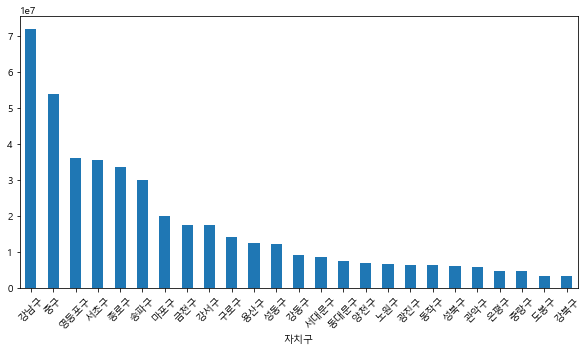

In [29]:
#자치구별 gdp
#x축에는 자치구명을, y축에는 gdp를 넣고 정렬 후 gdp_result에 저장. 
#gdp_result를 시각화

gdp_result = result.groupby(["자치구"])["지역내총생산(당해년가격)"].mean().sort_values(ascending = False)
gdp_result.plot.bar(rot=45, figsize = (10,5))

<AxesSubplot:xlabel='자치구'>

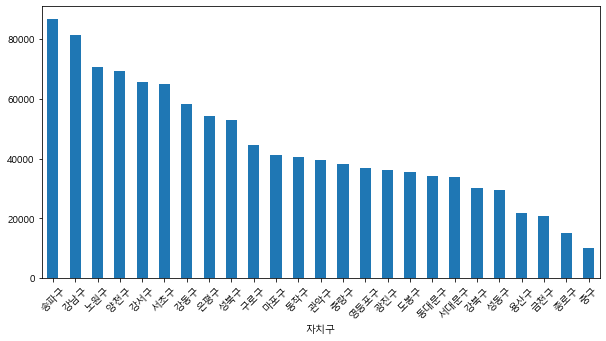

In [30]:
#자치구별 학생들
#x축에는 자치구명을, y축에는 총 학령인구 수를 넣고 정렬 후 stud_result에 저장. 
#stud_result를 시각화

stud_result = result.groupby(["자치구"])["총 학령인구"].mean().sort_values(ascending = False)
stud_result.plot.bar(rot=45, figsize = (10,5))